# Transportation Hub EDA

This file outlines a basic exploration of the tables we have access to, providing a space to monkey around with the underlying data.

In [2]:
# Import libraries.
import json
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import snowflake.connector
from skimage import io

In [3]:
# Set global variables.
CREDENTIALS_FILE = 'credentials.txt'
DATABASE_ROOT = 'TRANSPORTATION_HUB.HUB'

In [4]:
# Read in Snowflake credentials.
with open(CREDENTIALS_FILE, 'r') as f:
    creds = f.readlines()
    USER = creds[0].strip()
    PASSWORD = creds[1].strip()
    ACCOUNT = creds[2].strip()

In [5]:
# Open a connection and test that it works.
con = snowflake.connector.connect(
    user=USER,
    password=PASSWORD,
    account=ACCOUNT,
)
cs = con.cursor()
cs.execute("SELECT current_version()")
one_row = cs.fetchone()
print(one_row[0])

8.21.3


### Stops Data

**Description**: 

This table details the stops on given routes used by the transportation system.

**Notes**:
* There are ~8,100 stops across 87 routes.
* Many stops have identical locations, but correspond to different routes.
* Identical stops are distinguished by their "stop location ID".

In [6]:
# Import data as a Pandas Dataframe and preview.
cs.execute(f"SELECT * FROM {DATABASE_ROOT}.STOPS")
stops_data = cs.fetch_pandas_all()
stops_data

,STOP_ID,STOP_LOCATION_ID,ROUTE_ID,STOP_DESC,LATITUDE,LONGITUDE,ROUTE_DIRECTION,STOP_SEQUENCE,TIME_POINT
0,2031,3046,38,SW Jefferson Pkwy & McNary Pkwy,45.434653,-122.715529,Inbound,1900,False
1,2032,3048,38,Jefferson & Mt Jefferson,45.431282,-122.715873,Inbound,1800,False
2,2033,3051,6,SW Jefferson & 13th,45.516849,-122.687154,Inbound,2600,False
3,2034,3051,45,SW Jefferson & 13th,45.516849,-122.687154,Inbound,4250,False
4,2035,3051,55,SW Jefferson & 13th,45.516849,-122.687154,Inbound,2500,False
...,...,...,...,...,...,...,...,...,...
8117,2026,3039,96,SW Jefferson & Broadway,45.515366,-122.681593,Inbound,1650,True
8118,2027,3040,38,Jefferson & Independence,45.432118,-122.716009,Outbound,2000,False
8119,2028,3041,38,Jefferson & Independence,45.432045,-122.715847,Inbound,1850,False
8120,2029,3043,38,2 Jefferson Parkway,45.430704,-122.716343,Inbound,1750,False


In [7]:
# Count the unique stops and routes.
print(f"There are {stops_data['STOP_ID'].unique().size} unique stops.")
print(f"There are {stops_data['ROUTE_ID'].unique().size} unique routes.")

There are 8122 unique stops.
There are 87 unique routes.


In [8]:
# Check that all the stop id's are represented.
stops_data['STOP_ID'].sort_values()

6092       1
6093       2
6094       3
6095       4
6096       5
        ... 
4057    8118
4058    8119
4059    8120
4060    8121
4061    8122
Name: STOP_ID, Length: 8122, dtype: int16

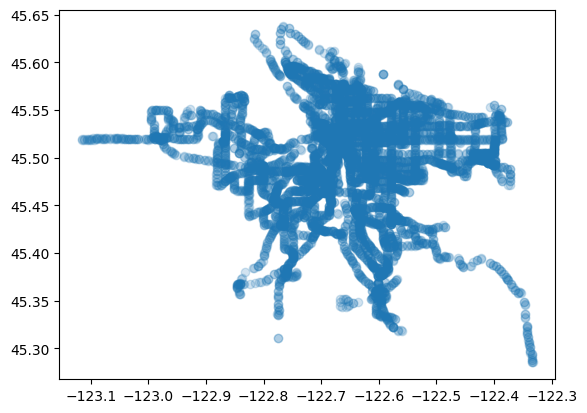

In [9]:
# Try plotting the stops.
plt.scatter(stops_data['LONGITUDE'], stops_data['LATITUDE'], alpha=0.2)

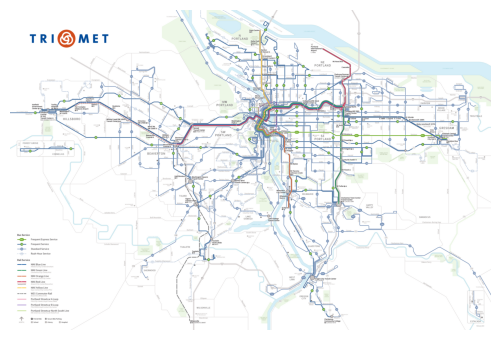

In [ ]:
# Check against the actual route map
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

f = "https://trimet.org/maps/img/trimetsystem.png"
a = io.imread(f)

plt.imshow(a)
plt.axis('off')

plt.show()

### Route Shapes Data

**Description**: 

This table contains the geographic data for each route.

**Notes**:
* There are 87 unique routes with shape data.
* However, routes often (but not always) have "Inbound" and "Outbound" variations.
* This results in a total of 181 route shapes.

In [10]:
# Import data as a Pandas Dataframe and preview.
cs.execute(f"SELECT * FROM {DATABASE_ROOT}.ROUTE_SHAPES")
route_shape_data = cs.fetch_pandas_all()
route_shape_data

,ROUTE_SHAPE_ID,ROUTE_ID,DIRECTION,DIRECTION_DESC,GEOGRAPHY
0,1,1,Inbound,To Portland City Center,"{\n ""coordinates"": [\n [\n 7.63223890..."
1,2,1,Outbound,To Hayhurst and Maplewood via Vermont,"{\n ""coordinates"": [\n [\n 7.64410690..."
2,3,2,Inbound,To Portland City Center,"{\n ""coordinates"": [\n [\n [\n ..."
3,4,2,Outbound,To Gresham,"{\n ""coordinates"": [\n [\n [\n ..."
4,5,4,Inbound,To Portland City Center,"{\n ""coordinates"": [\n [\n 7.62570170..."
...,...,...,...,...,...
176,177,208,Outbound,To South Waterfront,"{\n ""coordinates"": [\n [\n 7.64220350..."
177,178,290,Inbound,To Milwaukie,"{\n ""coordinates"": [\n [\n [\n ..."
178,179,290,Outbound,To Portland City Center,"{\n ""coordinates"": [\n [\n 7.65406780..."
179,180,291,Outbound,To Milwaukie,"{\n ""coordinates"": [\n [\n [\n ..."


In [11]:
# Count the unique routes.
print(f"There are {route_shape_data['ROUTE_ID'].unique().size} unique routes.")

There are 87 unique routes.


In [12]:
# Filter down to an arbitrary route.
arbitrary_route_data = route_shape_data.loc[route_shape_data['ROUTE_SHAPE_ID'] == 1]
arbitrary_route_data

,ROUTE_SHAPE_ID,ROUTE_ID,DIRECTION,DIRECTION_DESC,GEOGRAPHY
0,1,1,Inbound,To Portland City Center,"{\n ""coordinates"": [\n [\n 7.63223890..."


In [13]:
# Extract that route's data and process into a data structure.
arbitrary_route_shape_data = json.loads(arbitrary_route_data['GEOGRAPHY'][0])
arbitrary_route_shape_data_coordinates = arbitrary_route_shape_data['coordinates']
long_vals = [x[0] for x in arbitrary_route_shape_data_coordinates]
lat_vals = [x[1] for x in arbitrary_route_shape_data_coordinates]

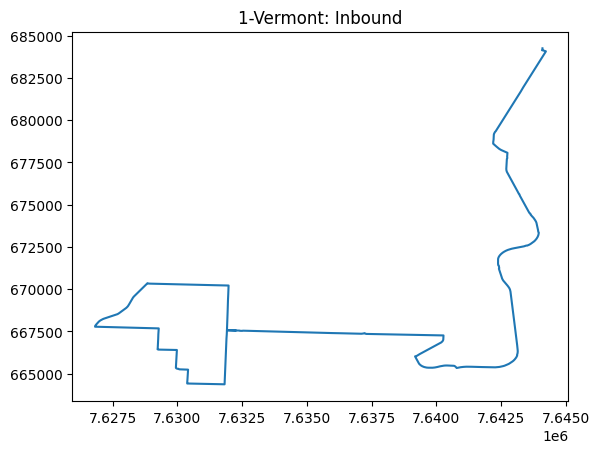

In [14]:
# Draw the route.
plot = plt.plot(long_vals, lat_vals)
plt.title('1-Vermont: Inbound')
plot

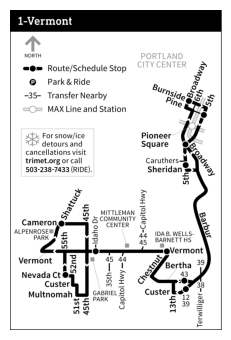

In [ ]:
# Check against the actual route map
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

f = "https://trimet.org/schedules/img/001.png"
a = io.imread(f)

plt.imshow(a)
plt.axis('off')

plt.show()

### Trip Delays

In [15]:
# Import data as a Pandas Dataframe and preview.
cs.execute(f"SELECT * FROM {DATABASE_ROOT}.TRIP_DELAYS")
trip_delay_data = cs.fetch_pandas_all()
trip_delay_data

,TRIP_DELAY_ID,YEAR,MONTH,DAY,DAY_OF_WEEK,TIME,TIMESTAMP,TRIP_ID,TRIP_STOP_SEQUENCE,STOP_LOCATION_ID,DELAY
0,179957,2023,9,19,Tue,18:30:23,2023-09-19 18:30:23,12769108,30,8344,253.0
1,179974,2023,9,19,Tue,18:36:16,2023-09-19 18:36:16,12769108,32,8346,233.0
2,179975,2023,9,19,Tue,18:36:33,2023-09-19 18:36:33,12769108,32,8346,231.0
3,179986,2023,9,19,Tue,18:40:07,2023-09-19 18:40:07,12769108,33,8347,236.0
4,180000,2023,9,19,Tue,18:45:29,2023-09-19 18:45:29,12769108,35,8349,216.0
...,...,...,...,...,...,...,...,...,...,...,...
1442288,1442269,2023,9,25,Mon,07:26:39,2023-09-25 07:26:39,12810486,14,13716,310.0
1442289,1442275,2023,9,25,Mon,07:28:57,2023-09-25 07:28:57,12810486,15,13717,309.0
1442290,1442277,2023,9,25,Mon,07:29:27,2023-09-25 07:29:27,12810486,15,13717,283.0
1442291,1442288,2023,9,25,Mon,07:33:31,2023-09-25 07:33:31,12810486,16,13718,299.0


In [16]:
# Count the unique routes.
print(f"There are {trip_delay_data['TRIP_DELAY_ID'].unique().size} delays.")

There are 1442293 delays.


### Agencies (TBD)

### Routes (TBD)

### Stop Schedule (TBD)

### Stop Times (TBD)

### Trips (TBD)

### Vehicles (TBD)

### Vehicle Positions (TBD)

## Trips

In [17]:
# Import data as a Pandas Dataframe and preview.
cs.execute(f"SELECT * FROM {DATABASE_ROOT}.TRIPS")
trip_data = cs.fetch_pandas_all()
trip_data

,TRIP_ID,ROUTE_ID,ROUTE_DIRECTION
0,12768209,94,Outbound
1,12764244,74,Inbound
2,12757617,34,Outbound
3,12762205,70,Inbound
4,12762383,71,Outbound
...,...,...,...
19582,12790977,32,Outbound
19583,12800772,87,Outbound
19584,12774812,290,Outbound
19585,12752025,12,Inbound


In [18]:
# Count the unique routes.
print(f"There are {trip_data['TRIP_ID'].unique().size} trips.")

There are 19587 trips.


In [19]:
trip_delay_data_merged = trip_delay_data.merge(trip_data, on='TRIP_ID')
trip_delay_data_merged 

,TRIP_DELAY_ID,YEAR,MONTH,DAY,DAY_OF_WEEK,TIME,TIMESTAMP,TRIP_ID,TRIP_STOP_SEQUENCE,STOP_LOCATION_ID,DELAY,ROUTE_ID,ROUTE_DIRECTION
0,179957,2023,9,19,Tue,18:30:23,2023-09-19 18:30:23,12769108,30,8344,253.0,100,Outbound
1,179974,2023,9,19,Tue,18:36:16,2023-09-19 18:36:16,12769108,32,8346,233.0,100,Outbound
2,179975,2023,9,19,Tue,18:36:33,2023-09-19 18:36:33,12769108,32,8346,231.0,100,Outbound
3,179986,2023,9,19,Tue,18:40:07,2023-09-19 18:40:07,12769108,33,8347,236.0,100,Outbound
4,180000,2023,9,19,Tue,18:45:29,2023-09-19 18:45:29,12769108,35,8349,216.0,100,Outbound
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308678,1442269,2023,9,25,Mon,07:26:39,2023-09-25 07:26:39,12810486,14,13716,310.0,290,Inbound
1308679,1442275,2023,9,25,Mon,07:28:57,2023-09-25 07:28:57,12810486,15,13717,309.0,290,Inbound
1308680,1442277,2023,9,25,Mon,07:29:27,2023-09-25 07:29:27,12810486,15,13717,283.0,290,Inbound
1308681,1442288,2023,9,25,Mon,07:33:31,2023-09-25 07:33:31,12810486,16,13718,299.0,290,Inbound
